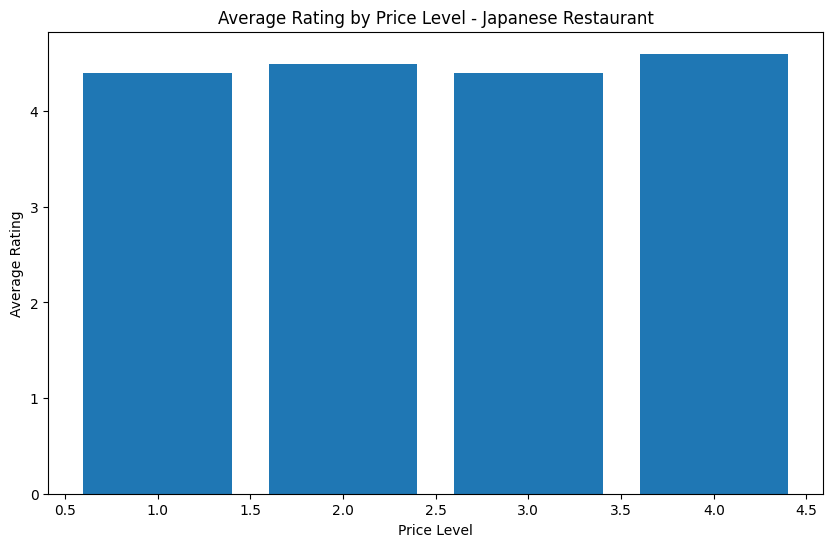

In [33]:
import requests
import json
import matplotlib.pyplot as plt
import pandas as pd

with open('api.json') as f:
    config = json.load(f)
api_key =config['api_key']


def plot_country_data(country_name, country_restaurants):
    average_ratings = country_restaurants.groupby('price_level').rating.mean().reset_index()

    plt.figure(figsize=(10, 6))
    plt.bar(average_ratings['price_level'], average_ratings['rating'])
    plt.title(f'Average Rating by Price Level - {country_name}')
    plt.xlabel('Price Level')
    plt.ylabel('Average Rating')
    plt.show()


def get_restaurants(api_key, query, location, radius=2000):
    base_url = "https://maps.googleapis.com/maps/api/place/textsearch/json"
    params = {
        "query":query,
        "location": location,
        "radius": radius,
        "key": api_key
    }
    response = requests.get(base_url, params = params)
    results = response.json()["results"]

    return results

def main(country):
    api_key = config['api_key']
    location = "40.712776, -74.005974"   # Latitude and Longitude of NYC
    radius = 2000 # (Meters)

    country_restaurants = get_restaurants(api_key, country, location, radius)

    country_restaurants_df = pd.DataFrame(country_restaurants)
    
    plot_country_data(country, country_restaurants_df)


main("Japanese Restaurant")




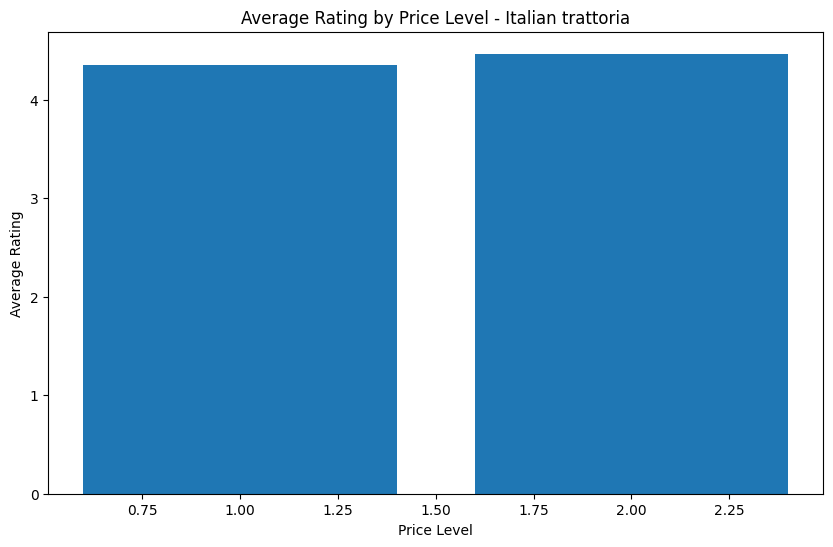

In [14]:
main("Italian trattoria")

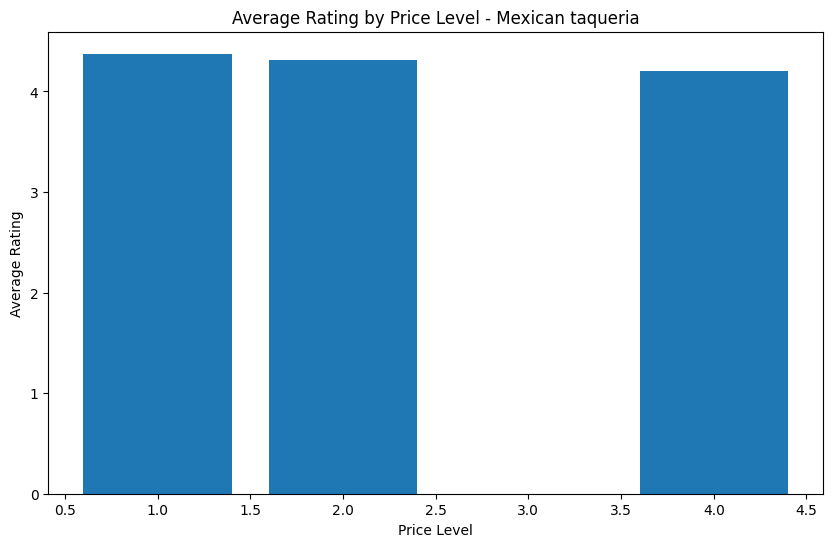

In [15]:
main("Mexican taqueria")

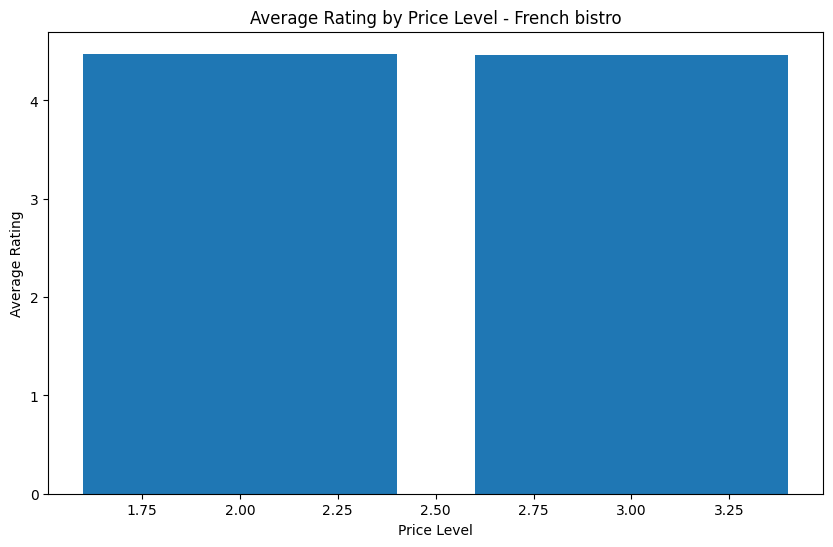

In [16]:
main("French bistro")

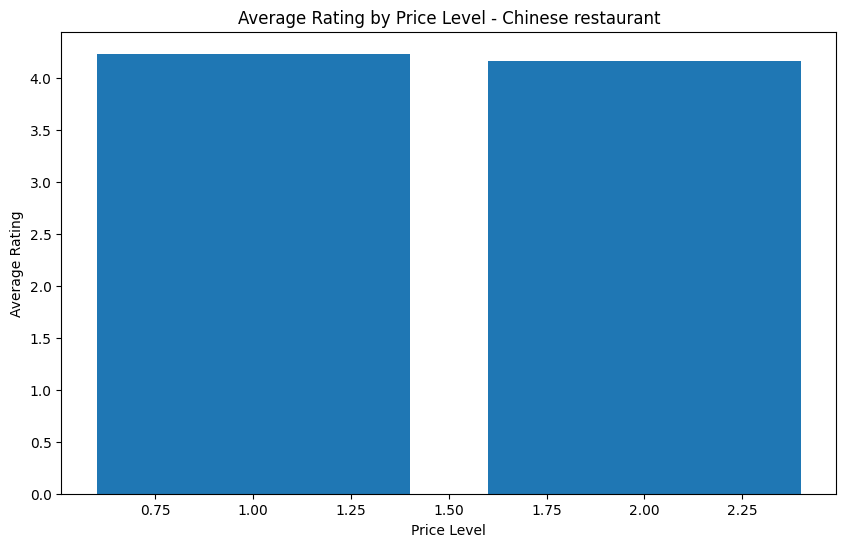

In [34]:
main("Chinese restaurant")

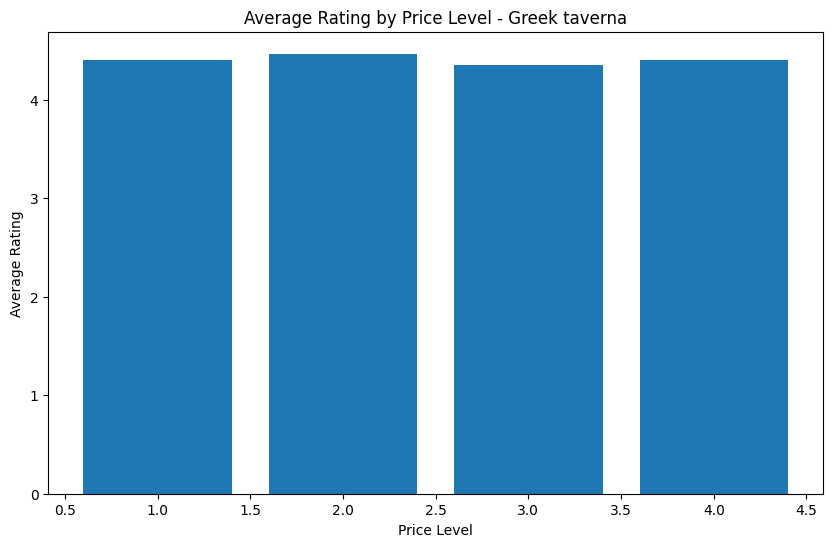

In [18]:
main("Greek taverna")

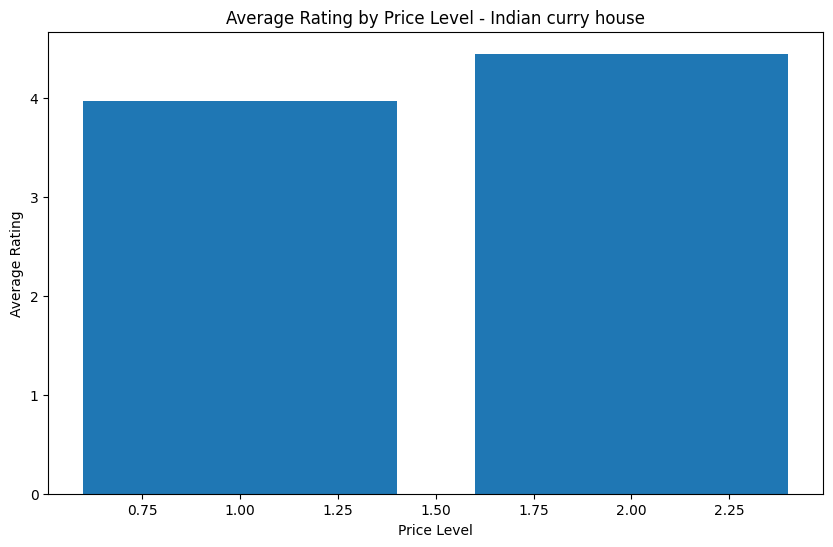

In [19]:
main("Indian curry house")

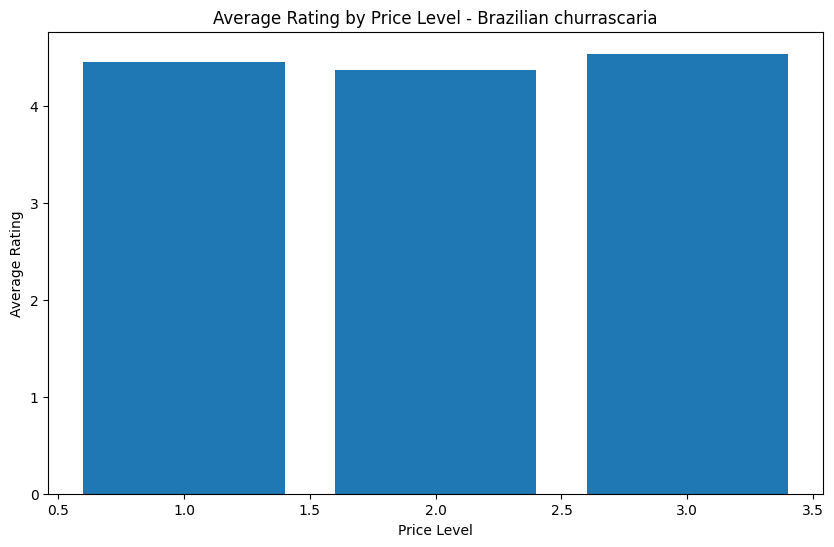

In [20]:
main("Brazilian churrascaria")

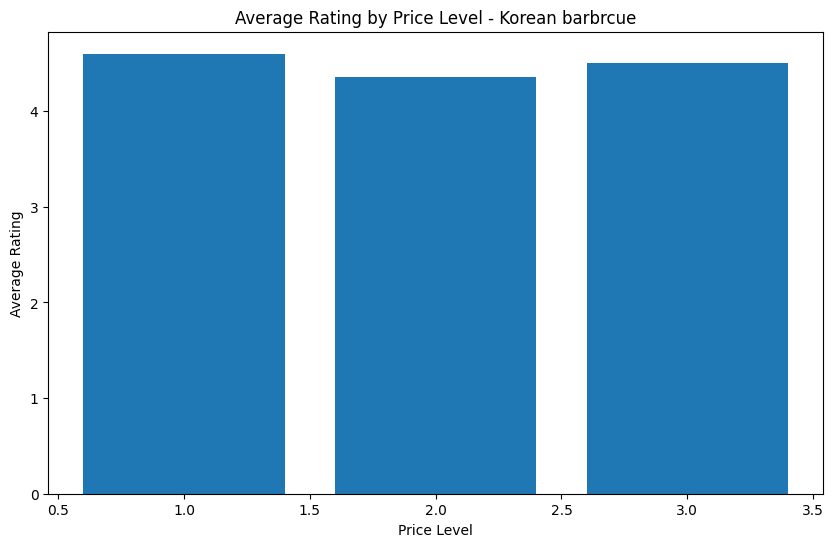

In [21]:
main("Korean barbrcue")

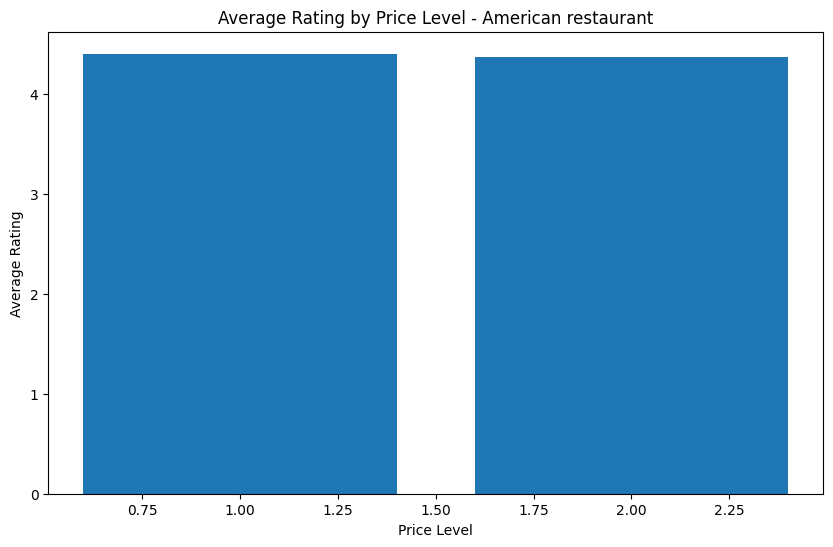

In [22]:
main("American restaurant")

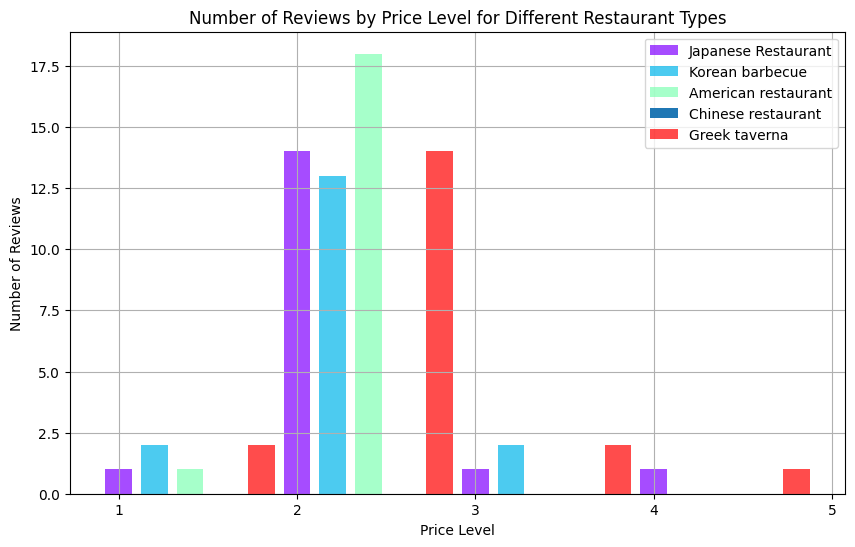

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import json
import requests

def plot_reviews_by_price_level(all_restaurants):
    
    countries = ["Japanese Restaurant", "Korean barbecue", "American restaurant", "Chinese restaurant", "Greek taverna"]
    colors = plt.cm.rainbow(np.linspace(0, 1, len(countries)))
    
    fig, ax = plt.subplots(figsize=(10, 6))
    
    for i, country in enumerate(countries):
        country_data = all_restaurants[all_restaurants['country'] == country]
        reviews_by_price = country_data.groupby('price_level').size()
        
        # Offset each bar horizontally and add some space between bars
        offset = i * 0.2
        ax.bar(reviews_by_price.index + offset, reviews_by_price, color=colors[i], alpha=0.7, width=0.15, label=country)

    ax.legend()
    ax.set_xlabel('Price Level')
    ax.set_ylabel('Number of Reviews')
    ax.set_title('Number of Reviews by Price Level for Different Restaurant Types')
    ax.set_xticks(np.arange(1, 6))
    ax.grid(True)
    
    plt.show()

def main():
    with open('api.json') as f:
        config = json.load(f)
    api_key = config['api_key']
    location = "40.712776,-74.005974"  
    radius = 2000  

    cuisines = ["Japanese Restaurant", "Italian trattoria", "Mexican taqueria", "French bistro", "Thai cuisine", "Indian curry house", "Greek taverna", "Brazilian churrascaria", "Korean barbecue", "American restaurant"]
    selected_cuisines = ["Japanese Restaurant", "Korean barbecue", "American restaurant", "Chinese restaurant", "Greek taverna"]
    all_restaurants = []

    for cuisine in cuisines:
        if cuisine in selected_cuisines:
            restaurants = get_restaurants(api_key, cuisine, location, radius)
            
            for restaurant in restaurants:
                restaurant["country"] = cuisine
            
            all_restaurants.extend(restaurants)

    all_restaurants_df = pd.DataFrame(all_restaurants)

    plot_reviews_by_price_level(all_restaurants_df)

main()
